# Elements of Machine Learning: Solving Regression Problems

### A introductory session for machine learning and its application to geospatial problems 

##### Dr. Jiong (Jon) Wang,  j.wang2@uu.nl


## Foreword
-------------------
**Regression** techniques are used for exploring potential dependencies among phenomena. Better understanding of the dependencies not only uncovers the mechanisms of interactions among phenomena in a system, but also helps to make predictions about the dynamics of one phenomenon if we know the change of another if dependencies can be found between two phenomena in a system. For instance, if we have observed air pollutants accumulation patterns in a city is dependent upon the morphology of urban elements in this city, such as road network density or building density, then, not only we would acquire knowledge about the interaction between urban elements and air pollutants within this city-atmospheric system, but also we can predict air pollution everywhere around the city by measuring street patterns from *Open Street Map* without putting expensive sensors densely around the entire city.

To explore dependencies among phenomena, we rely on measurements which are essentially discrete samples. Such as air pollution concentration at a certain location within a city, or road configuration/density within a buffer at this location. Here, the phenomena air pollution and road network configuration are measured by **variables** pollution concentration and road density. And the dependencies between the two phenomena is characterized by statistical measurements of the relationship between the two variables. This measured relationship is finally used to make predictions everywhere we don't have measurements for both variables but only one of them. Hence if we have one of the variable measured everywhere, it is then posssible to predict the other variable everywhere. This is why **regression** has been summaried as *a technique of using discrete values for predicting continues values*.

In *machine learning*, exploring dependencies is achieved by training an **assumed/hypothesized** model **M** by using the measured or observed discrete **variables** **X** and **Y** to capture the relationship between **X** and **Y**. For example, *machine learning* can be used to train and fit a *linear model* 

**M(X) = θ<sup>T</sup>X** 

to the **X** and **Y** by searching optimal **θ** through [*gradient descent*](https://en.wikipedia.org/wiki/Gradient_descent). Thus *machine learning* serves to solve the well known conventional *Ordinary Least Squares (OLS)* problem as *analytical solution* is not alway feasible with many observations/measurements in a big dataset. But *machine learning* is definitely not restricted only to solve OLS problems. In fact, *machine learning* allows you to solve **regression** problems in flexible ways, where you can train your model to fit the data while taking care of several issues such as big data, model complexity, bias-variance trade-off, and variable selection.

On this page, you will be able to walk through the basics and common issues in *machine learning* based **regression** techniques. You will start by working with the simplest scenario: linear model fitting in 1-dimension, where there is only one variable *x* in **X** leading to **M(X)** as 

**M(x) = θ<sub>1</sub> + θ<sub>2</sub>x**. 

Soon after experimenting with this simple setup, you will be training a polynomial model in the form of 

**M(x) = θ<sub>1</sub> + θ<sub>2</sub>x<sup>2</sup> + ... + θ<sub>n</sub>x<sup>n</sup>**, 

or 

**M(X) = θ<sup>T</sup>X** 

where **X** becomes to *(1, x, x<sup>2</sup>,...,x<sup>n</sup>)<sup>T</sup>*, and **θ** becomes to *(θ<sub>1</sub>, θ<sub>2</sub>,...,θ<sub>n</sub>)*.

Essentially, if you consider *(1, x, x<sup>2</sup>,...,x<sup>n</sup>)<sup>T</sup>* to be *(1, x<sub>1</sub>, x<sub>2</sub>,...,x<sub>n</sub>)<sup>T</sup>*, the polynomial is equivalent and actually a special case of **multivariable** linear model fitting/training as

**M(x) = θ<sub>1</sub> + θ<sub>2</sub>x<sub>2</sub> + ... + θ<sub>n</sub>x<sub>n</sub>**, 

where each variable is a polynomial transformation of the original input *x*! In *machine learning*, this is also referred as **features** as they are the feature descriptors of the dependent variable. Today, with large amount of data available, **regression** is constantly cast into the context of big data. This immediately leads to a difficult situation: there are potentially large amount of **features** can be used for **regression**, as you can either add new **variables**, or tranform the input **variables** into new features. 

How to deal with this? That's where **regularization**, which stems from the **Bayes method** will be introduced -- the learning curve is getting steep. **Regularization** helps you to control the model complexity through constrain the impact of the **features** or **variables**. But you can also start from the other way around -- adding simple models together to achieve a proper complexity. For instance, combining basic models such as the **tree** based models. From here, you will be able to apply **tree** based models and their **ensemble** version, the **Random Forest**. You will also get yourself familiar with the **Random Forest** by working with real datasets! That's the ultimate purpose of this session: using *machine learning* to solve real world problems.

0 Getting started: Linear model fitting in 1-dimension
-------------------
In this section, you will be warming up through a short recap of fitting linear models to data in simple 1-dimensional scenario. This helps you to pick up basic considerations such as model selection, model complexity, and bias-variance trade-off. You will NOT work with real datasets, instead, an artificially generated **dummy** dataset will be created for your experiment. In this way, you will have the knowledge about the underlying true model, which is normally unknown in real world situations. Then you will have a chance to compare how arbitrarily selected models can approximate the underlying true model.

In [1]:
%matplotlib inline  # In order to plot figures inline in Jupyter Notebook, we need to run this. But please ignore this in Colab.

UsageError: unrecognized arguments: # In order to plot figures inline in Jupyter Notebook, we need to run this. But please ignore this in Colab.


### 0.0 Creating dummy dataset 

(10, 1)


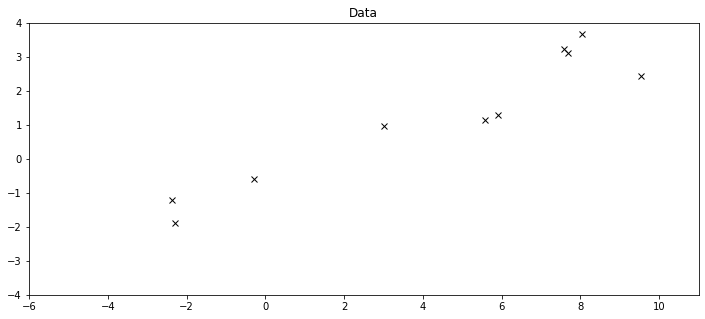

In [18]:
import numpy as np  # You will be using Numpy module
import matplotlib.pyplot as plt  # Module for visualization will also be used

# Define the true function for generating dummy dataset
def func(x):
    # Generate sample dataset from a linearly transformed sinusoidal function: y=sin(x)+0.3*x+e (where 'e' is random noise)
    return np.sin(x) + .3*x

# Define function for generating dummy dataset
def dummyData(func, sample_size, std):
    # Artificially generate input x
    x = np.random.rand(sample_size)[:,None]; x=x*15-5
    # Call function to generate response y
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

# Generate dummy dataset
# 10 data points are created for model training, and another 5 are created to test the accuracy of the model
x_train, y_train = dummyData(func, 10, 0.25)

# Visualize the artificially generated dataset
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data')
plt.plot(x_train,y_train,'kx',label='training data')

### 0.1 Fitting models to the data

Without knowing the true model and limited observations, you need to specify different models to fit the data. The simplest way is to fit a linear model to the data

You need to first train/fit the linear model, then predict values everywhere to visualize a line manifesting the linear model. Here is how you train the linear model using the Ordinary Least Squares (OLS)

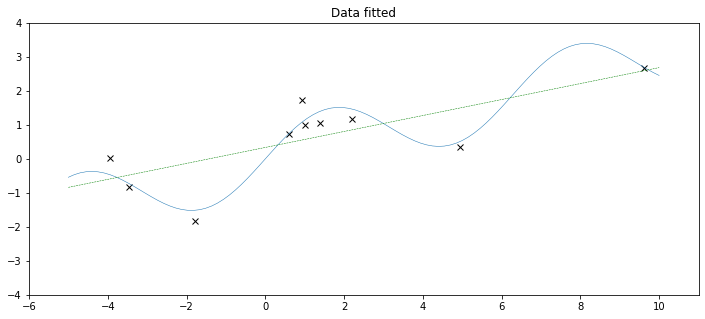

In [3]:
# Define a function to fit a linear model to the dummy data.
def fit(x, y):
    # x : (N, D) np.ndarray
    # y : (N,) np.ndarray
    # Linear fit means a linear model in the form of M(x) = θ1 + θ2x is assumed
    # Or, in the form of matrix multiplication M(X) = θ'X, where
    # X is referred as designed vector/matrix in the form of [1, x]' and θ is [θ1, θ2]'
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    
    # Given the observed data y, a proper solution of θ to M(x) can be: θ* = argmin (||y - X @ θ||^2_2)
    theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)  # If you see an @ in the middle of a line, that's matrix multiplication.
    var = np.mean(np.square(X_mat @ theta - y))
    return theta, var

def predict(x, theta, var, return_std:bool=False):
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    y = X_mat @ theta
    if return_std:
        y_std = np.sqrt(var) + np.zeros_like(y)
        return y, y_std
    return y

weights, variance = fit(x_train, y_train)

x_all = np.linspace(-5, 10, 100).reshape(-1,1)
y_predict = predict(x_all, weights, variance)

y_true = func(x_all)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)

### Short exercise 0.0

In the above example, you have attempted to train a linear model by using 10 observations, please try to generate another set of data, which may contain same, less or more amount of data points, using the same underlying true model, and fit your linear model again. Do you see some difference?

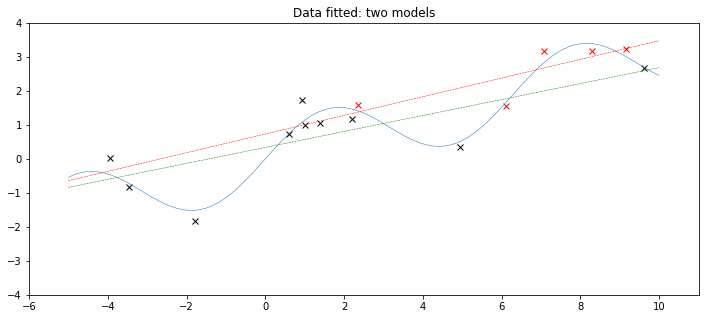

In [4]:
#==================================
# Answers and hints 0.1
#==================================

# Another set of observations
x_train2, y_train2 = dummyData(func, 5, 0.25)  # With less (only 5) observations
weights2, variance2 = fit(x_train2, y_train2)

x_all = np.linspace(-5, 10, 100).reshape(-1,1)
y_predict2 = predict(x_all, weights2, variance2)

y_true = func(x_all)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted: two models')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_train2,y_train2,'rx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)
plt.plot(x_all, y_predict2, '--r', linewidth=.5)

1 Polynomial curve fitting and regularization
-------------------
So far, linear model seems to be too simple to capture the variance in the data, which is actually generated from a flexible sinusoidal model as the latent function. Intuitively, you need more flexible model to capture data with large variantion. However, since you do not really know the latent model which generated the data, you do not want to make our model to be too flexible that leads to overfitting.

In this section, you will see how model complexity influence model fitting. This will be illustrated through a **polynomial curve fitting**, where different orders of polynomial model will be fitted to the above dummy dataset. You will notice how complex higher order polynomial model capture all the variance but overfit the data. To control the complexity of model and avoid overfitting, one option is to impose restrictions upon the model parameters while fit the model to data. A key idea in machine learning based regression, **regularization**, will thus be introduced. **Regularization** is an important technique for you to cope with model complexity. Various versions of **regularization**, such as the *lasso* and *ridge* regressions, are widely adopted.

### 1.0 Polynomial curve fitting

Fitting polynomial models to dummy dataset. The complexity of the model is controlled by the orders of polynomial terms. For instance, polynomial model with order of 2 with polynomial terms (x, x^2) is more complex than that of order 3 with polynomial terms (x, x^2, x^3).

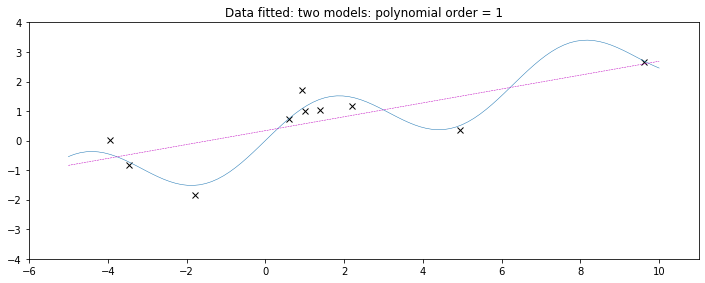

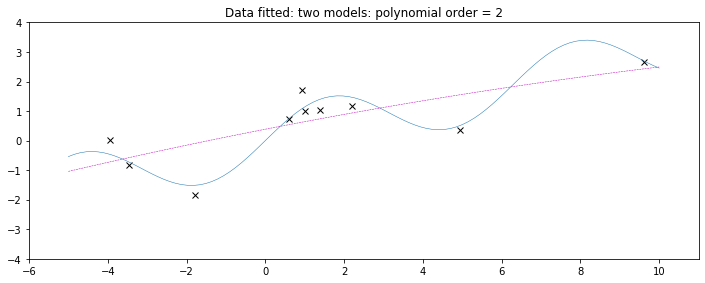

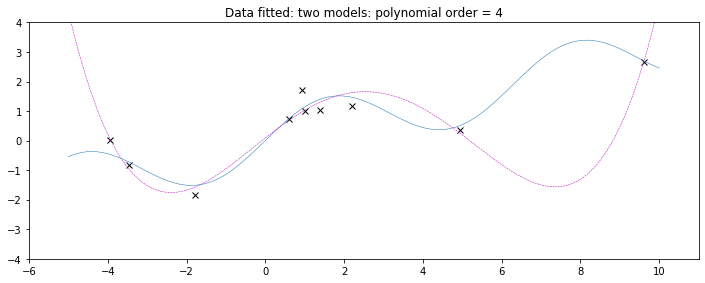

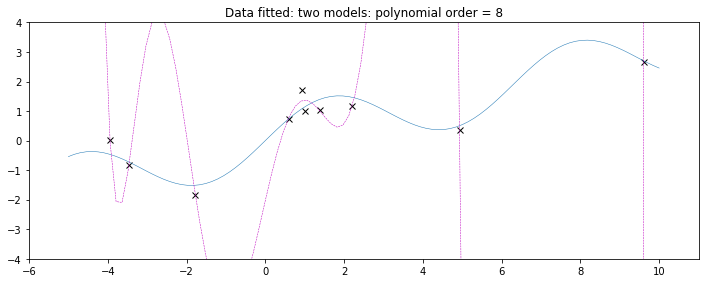

In [5]:
import functools
import itertools

# Define a fuction that project inputs into higher order polynomial inputs. 
# For instance, when degree=3, x becomes to (x, x^2, x^3).
def transform(x, degree):
    # Transforms input array with polynomial features
    # x : (sample_size, n) ndarray
    # Output : (sample_size, 1 + nC1 + ... + nCd) ndarray

    if x.ndim == 1:
        x = x[:, None]
    x_t = x.transpose()
    features = []
    for degree in range(1, degree + 1):
        for items in itertools.combinations_with_replacement(x_t, degree):
            features.append(functools.reduce(lambda x, y: x * y, items))
    return np.asarray(features).transpose()

for i, deg in enumerate([1, 2, 4, 8]):
    plt.figure(figsize=(12,20))
    plt.subplot(4, 1, i + 1)
    
    x_poly = transform(x_train, deg)  # Project original inputs into polynomial inputs
    weights3, variance3 = fit(x_poly, y_train)  # Fit data as a linear combination of the polynomial inputs
    y_predict3 = predict(transform(x_all, deg), weights3, variance3)  # Prediction
    
    y_true = func(x_all)  # True model values
    
    plt.xlim([-6., 11])
    plt.ylim([-4, 4])
    plt.title('Data fitted: two models: '+'polynomial order = '+str(2**i))
    plt.plot(x_train,y_train,'kx',label='training data')  # Plot dummy dataset data points
    plt.plot(x_all, y_true, linewidth=.5)  # True model values
    plt.plot(x_all, y_predict3, '--m', linewidth=.5)  # Polynomial data fit


### 1.1 Control model complexity, regularization, and feature selection

A simple way regularize the complexity of the polynomial model can be achieved by imposing restrictions upon the weights of higher order polynomial terms. You need to define a new function that can control the impact of model weights **θ** to restrict the influence of higher order terms in **x**. Technically, you can achieve this by adding a **regularization** term to our fitting function already defined in *section 0.2*.

The **regularization term** restricts model weights **θ** within a certain range control the effects of regression terms, such as **(x1, x2, x3,..., xn)** of the polynomial terms. When the effects of these regression terms, especially the higher order ones, are restricted, the complexity of the model is controlled.

You can of course design different forms of **regularization** to achieve different restriction effects. Popular **regularization** approaches have names such as **ridge regression** and **lasso regression**. The **regularization** term in **ridge regression** is introduced into the OLS loss function in the form of **||θ||^2_2**, thus the value of **θ** is also minimized while minimizing the loss function. It achieves an overall restriction for all **θ** equally, or for instance, for an 8 order polynomial model, **(θ1, θ2, θ3,..., θ8)** are all shrinking towards 0. **Lasso regression** imposes a **regularization** term in the form of **||θ||_1**, which eliminates **θ** in a way that some of them are eliminated more significant than the others. Ultimately, **lasso regression** reduces model complexity by deleting regressio terms, and acts as a feature selection tool if you consider **(x1, x2, x3,..., xn)** as features in multivariable regression.

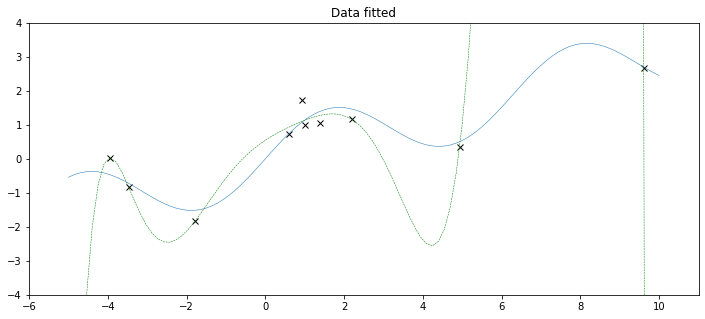

In [6]:
# Here is how you train the linear model using the regularized Ordinary Least Squares (OLS)
# The regularization term restricts θ within ||θ||^2_2, which is known as the ridge regression.
def fit_reg(x, y, alpha):
    # x : (N, D) np.ndarray
    # y : (N,) np.ndarray
    # Similar to what has been defined in section 0.2, you need a designed matrix
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    
    # Now, a regularization term ||θ||^2_2 is introduced to control θ that restricts θ within certain range.
    # The parameter alpha controls the extent of the restriction or regularization.
    # Given the observed y, the solution of θ in section 0.2 becomes: θ* = argmin (||y - X @ θ||^2_2 + alpha * ||θ||^2_2)
    eye = np.eye(np.size(X_mat, 1))
    theta = np.linalg.solve(alpha * eye + X_mat.T @ X_mat, X_mat.T @ y)
    
    #w = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)  # If you see an @ in the middle of a line, that's matrix multiplication.
    var = np.mean(np.square(X_mat @ theta - y))
    return theta, var

deg = 8  # Polynomial model of order 8 already shown above

# Parameter that control the extent of restriction imposed upon model weights θ.
# Please try to experiment with this parameter to see how it affects the model fitting.
# As you can see when alpha is larger than 1e-1, the polynomial model with order 8 is already significantly restricted compared to that in the image above.
alpha = 1e-1

weights, variance = fit_reg(transform(x_train, deg), y_train, alpha)

y_predict = predict(transform(x_all, deg), weights, variance)

plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)

C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5617080020984844, tolerance: 0.0014668897614205328
  positive)


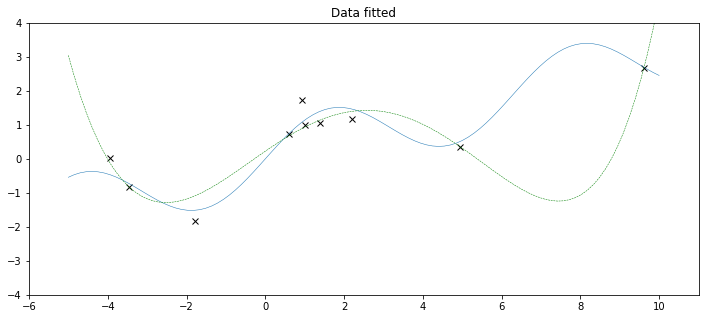

In [7]:
# By adding a regularization term to the loss function of OLS in the form of ||θ||_1, it becomes the lasso regression. 
# And the loss function to solve θ in section 0.2 becomes: θ* = argmin (||y - X @ θ||^2_2 + alpha * ||θ||_1).

# In fact you don't need to write the function to implement every kind of regularized regression as for illustration shown above.
# There are already many great Python modules that implemented these widely used regression techniques.
# For instance, you can directly import the Lasso function provided by the "sklearn" module as shown below.

from sklearn.linear_model import Lasso

# By using Lasso function provided by "sklearn", you don't even have to generate the designed matrix from the input, the function takes care of the original input for you.
# But you still need to create the 8 order regression terms (x, x^2, x^3,..., x^8) by transforming the input to enforce a polynomial model fitting.

deg = 8  # Again, use the polynomial model of order 8 already shown above

# You can directly define your model by calling the Lasso function imported from "sklearn", and set the extent of regularization.
model_lasso = Lasso(alpha=1e-1)  # Again, please try to experiment with this parameter to see how it affects the model fitting.

# Then, fit this model to the data.
model_lasso.fit(transform(x_train, deg), y_train)

# Make predictions every where to show the fitted curve.
y_predict = model_lasso.predict(transform(x_all, deg))

# Plot the data. Does the fitted curve look less complex than it was in section 1.1?
# Remember try to experiment with different alpha.
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)

2 Bayesian method and feature selection
-------------------
In fact, **regularization** stems from **Bayesian method**, which imposes a **prior distribution** upon model parameters while fitting to data. Essentially, fitting a **regularized** model is equivalent to maximize the probability distribution in the weight space along with a **regularized** or **prior distribution**.

### 2.0 Validation and parameter tuning

3 Tree based regression and additive models
-------------------
What happened so far is that you attempted to use a potentially complex model to fit our dummy data, but you also want to control the model to be not too complex. The main approach you took is to apply **regularization**. Briefly speaking, you tried to trim the model from a potentially complex one down to a simpler one. 

How about to try the other way around -- starting from an extremely simple model and add complexity to it until it meets our goal? This is exactly what **additive models** can do for you. You start with a very simply model, which does not even apply to your entire dataset, but only a small fraction of it. Such simple and poor model may only capture the pattern, such as the relationship between the independent and dependent variables, within a small interval. But once combined, several of these poor models together could be able to properly capture the pattern in the entire dataset. **Additive** is a general term describing such approach of combining simple models no matter what kind of simple models you apply. **Decision Tree** is the most widely used base model that to be combined in **additive** approach.

In this section, you will first learn to apply **Decision Tree** on, again, our dummy data set, to grab the idea of **tree based** regression. Then, you will be able to deploy the **additive** approach to combine the trees for larger dataset. ***You will be working with real dataset for the first time so far*** to experiment with all techniques you have learnt.

### 3.0 Decision Tree and regression


In [8]:
# Source: https://austindavidbrown.github.io/post/2019/01/regression-decision-trees-in-python/

import numpy as np
import matplotlib.pyplot as plt


class RegTree():
    @staticmethod
    def mse(v):
        return np.mean(np.square(v - np.mean(v)))

    @staticmethod
    def split_data(X, y, feature_index, feature_value):
        return {
            "I_left": np.where(X[:, feature_index] <= feature_value)[0],
            "I_right": np.where(X[:, feature_index] > feature_value)[0],
        }

    # Greedy algorithm for finding the best split
    @staticmethod
    def greedy_best_split(X, y):
        best_feature_index = 0
        best_split_value = 0
        best_dloss = 0
        best_split = {
            "I_left": np.array([]),
            "I_right": np.array([]),
        }

        n_features = X.shape[1]
        parent_mse = RegTree.mse(y)
        N = y.shape[0]
        for feature_index in range(0, n_features):
            split_values = np.unique(X[:, feature_index])
            for split_value in split_values:
                split = RegTree.split_data(X, y, feature_index, split_value)
                
                # If there is a split
                if split["I_left"].shape[0] > 0 and split["I_right"].shape[0] > 0:
                    # Compute the change in loss
                    N_left = split["I_left"].shape[0]
                    N_right = split["I_right"].shape[0]
                    dloss = parent_mse - 1/N * (N_left * RegTree.mse(y[split["I_left"]]) + N_right * RegTree.mse(y[split["I_right"]]))

                    # Update if the change in loss is the largest so far
                    if dloss >= best_dloss:
                        best_feature_index = feature_index
                        best_split_value = split_value
                        best_split = split
                        best_dloss = dloss

        return best_dloss, best_feature_index, best_split_value, best_split

    @staticmethod
    def fit_tree(X, y, depth = 1, max_depth = 100, tolerance = 10**(-3)):
        node = {}

        # Predict with the mean
        node["w"] = np.mean(y)

        node["left"] = None
        node["right"] = None

        # If we can split, find the best split by greedy algorithm
        if y.shape[0] >= 2:
            dloss, feature_index, split_value, split = RegTree.greedy_best_split(X, y)
            # If there is a greedy split and the stopping criterion is not met, branch 2 times
            if split["I_left"].shape[0] > 0 and split["I_right"].shape[0] > 0 and dloss >= tolerance and depth < max_depth:
                node["dloss"] = dloss
                node["feature_index"] = feature_index
                node["split_value"] = split_value

                node["left"] = RegTree.fit_tree(X[split["I_left"]], y[split["I_left"]], depth = depth + 1, max_depth = max_depth, tolerance = tolerance)
                node["right"] = RegTree.fit_tree(X[split["I_right"]], y[split["I_right"]], depth = depth + 1, max_depth = max_depth, tolerance = tolerance) 
        return node

    ###
    # Predict
    ###
    @staticmethod
    def predict_one(node, x):
        if node["left"] == None:
            return node["w"]
        else:
            if x[node["feature_index"]] <= node["split_value"]:
                return RegTree.predict_one(node["left"], x)
            else:
                return RegTree.predict_one(node["right"], x)

    @staticmethod
    def predict(node, X):
        n_samples = X.shape[0]
        predictions = np.zeros(n_samples)
        for i in range(0, n_samples):
            predictions[i] = RegTree.predict_one(node, X[i])
        return predictions

    @staticmethod
    def print_tree(node, depth = 0):
        if node["left"] == None:
            print(f'{depth * "  "}weight: {node["w"]}')
        else:
            print(f'{depth * "  "}X{node["feature_index"]} <= {node["split_value"]}')
            RegTree.print_tree(node["left"], depth + 1)
            RegTree.print_tree(node["right"], depth + 1)

In [9]:
# 

model_tree = RegTree.fit_tree(x_train, y_train, max_depth = 3, tolerance = 10**(-2))

print("Train MSE:", 1/x_train.shape[0] * np.sum(np.square(y_train - RegTree.predict(model_tree, x_train))))

Train MSE: 27.91202621561144


In [10]:
print("Train MSE:", 1/X_test.shape[0] * np.sum(np.square(y_test - RegTree.predict(model_tree, X_test))))

NameError: name 'X_test' is not defined

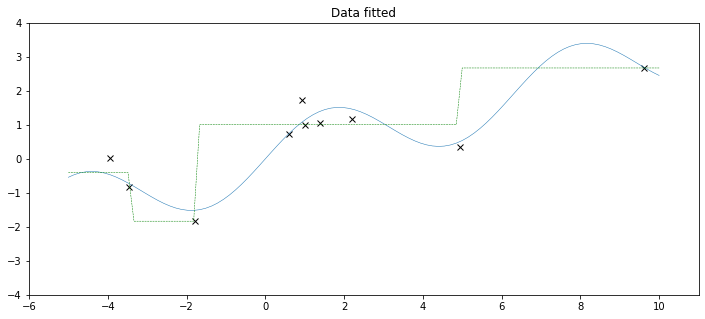

In [11]:
y_predict = RegTree.predict(model_tree, x_all)

# Plot the data. How does it look like compared to the curves you already fitted in all previous sections?
# Similarly, try to experiment with different parameters in configuring your Decision Tree.
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)

### 3.1 Decision Tree in sklearn

Similar to what you already encountered in **lasso regression**, you don't have to always write your own functions from scratch for the **Decision Tree** based regression. You can again use the ***sklearn*** module, which is a powerful package contains several machine learning based algorithms, including variations of **tree** based regression, such as the **Decision Tree** and its **additive** versions.

In [12]:
# Import sklearn along with all necessary modules

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

# Initiate a tree model
tree_depth = 3
model_tree = DecisionTreeRegressor(max_depth=tree_depth)

# Fit the model to your data.
# Please note that the output of this fitting is a model with several parameters that are configurable, so far you only configured "max_depth" while training/fitting.
model_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

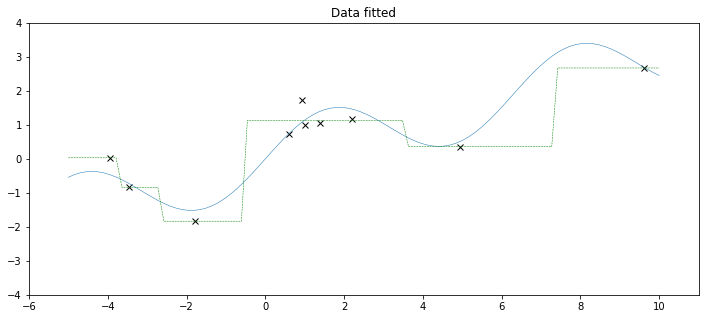

In [13]:
# Use the fitted model to predict every where for visualizing the fitted curve
y_predict = model_tree.predict(x_all)

# Plot
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)

### 3.2 Further inspection: features and feature selection


[Text(372.0, 428.08500000000004, 'X[0] <= -0.592\nentropy = 1.467\nsamples = 10\nvalue = 0.607'),
 Text(223.20000000000002, 305.775, 'X[0] <= -2.619\nentropy = 0.582\nsamples = 3\nvalue = -0.881'),
 Text(148.8, 183.46500000000003, 'X[0] <= -3.704\nentropy = 0.191\nsamples = 2\nvalue = -0.404'),
 Text(74.4, 61.15499999999997, 'entropy = 0.0\nsamples = 1\nvalue = 0.033'),
 Text(223.20000000000002, 61.15499999999997, 'entropy = 0.0\nsamples = 1\nvalue = -0.841'),
 Text(297.6, 183.46500000000003, 'entropy = 0.0\nsamples = 1\nvalue = -1.834'),
 Text(520.8000000000001, 305.775, 'X[0] <= 7.274\nentropy = 0.491\nsamples = 7\nvalue = 1.245'),
 Text(446.40000000000003, 183.46500000000003, 'X[0] <= 3.572\nentropy = 0.174\nsamples = 6\nvalue = 1.006'),
 Text(372.0, 61.15499999999997, 'entropy = 0.109\nsamples = 5\nvalue = 1.135'),
 Text(520.8000000000001, 61.15499999999997, 'entropy = -0.0\nsamples = 1\nvalue = 0.361'),
 Text(595.2, 183.46500000000003, 'entropy = 0.0\nsamples = 1\nvalue = 2.677')]

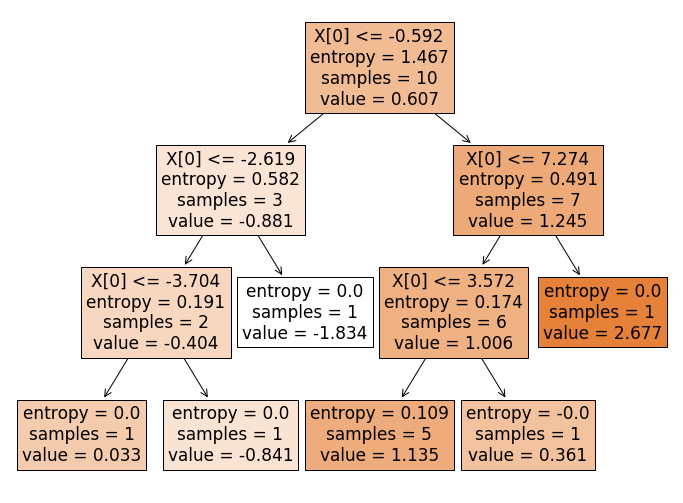

In [14]:
from sklearn import tree

fig = plt.figure(figsize=(tree_depth*4,tree_depth*3))
tree.plot_tree(model_tree, filled=True)

[Text(334.80000000000007, 428.08500000000004, 'X[0] <= -0.592\nentropy = 1.467\nsamples = 10\nvalue = 0.607'),
 Text(133.92000000000002, 305.775, 'X[1] <= 7.573\nentropy = 0.582\nsamples = 3\nvalue = -0.881'),
 Text(66.96000000000001, 183.46500000000003, 'entropy = 0.0\nsamples = 1\nvalue = -1.834'),
 Text(200.88000000000002, 183.46500000000003, 'X[0] <= -3.704\nentropy = 0.191\nsamples = 2\nvalue = -0.404'),
 Text(133.92000000000002, 61.15499999999997, 'entropy = 0.0\nsamples = 1\nvalue = 0.033'),
 Text(267.84000000000003, 61.15499999999997, 'entropy = 0.0\nsamples = 1\nvalue = -0.841'),
 Text(535.6800000000001, 305.775, 'X[0] <= 7.274\nentropy = 0.491\nsamples = 7\nvalue = 1.245'),
 Text(468.72, 183.46500000000003, 'X[1] <= 14.617\nentropy = 0.174\nsamples = 6\nvalue = 1.006'),
 Text(401.76000000000005, 61.15499999999997, 'entropy = 0.109\nsamples = 5\nvalue = 1.135'),
 Text(535.6800000000001, 61.15499999999997, 'entropy = -0.0\nsamples = 1\nvalue = 0.361'),
 Text(602.6400000000001, 

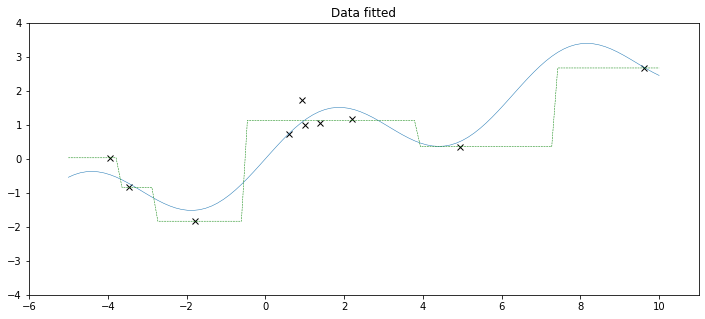

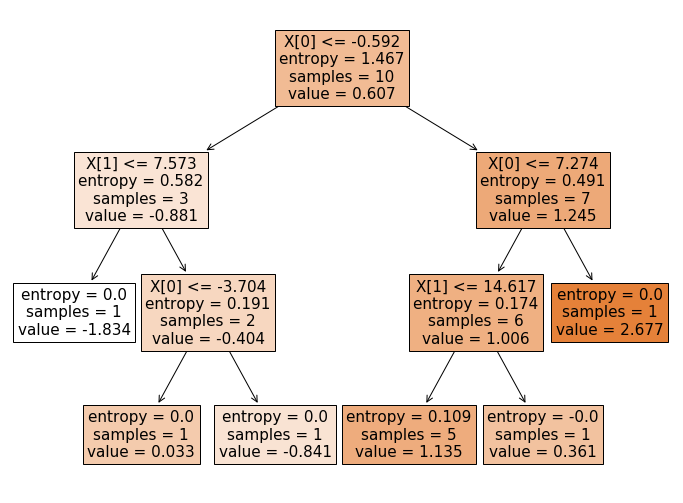

In [15]:
# Initiate a tree model
tree_depth = 3
model_tree = DecisionTreeRegressor(max_depth=tree_depth)

# First transform inputs with higher order features based upon the degree
deg = 2  # Again, similar as in section 1.1, 8 degree is used.
# Fit the model to your data.
x_poly = transform(x_train,deg)
model_tree.fit(x_poly, y_train)

# Use the fitted model to predict every where for visualizing the fitted curve
y_predict = model_tree.predict(transform(x_all,deg))

# Plot
plt.figure(figsize=(12,5))
plt.xlim([-6., 11])
plt.ylim([-4, 4])
plt.title('Data fitted')
plt.plot(x_train,y_train,'kx',label='training data')
plt.plot(x_all, y_true, linewidth=.5)
plt.plot(x_all, y_predict, '--g', linewidth=.5)

# Tree visualization
fig = plt.figure(figsize=(tree_depth*4,tree_depth*3))  # Adjust figure size according to the tree shape
tree.plot_tree(model_tree, filled=True)

Feature: 0, Score: 0.86812
Feature: 1, Score: 0.13188


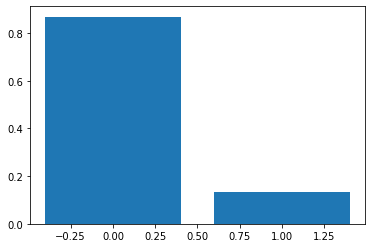

In [16]:
# Get feature importance
importance = model_tree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# Plot feature importance
plt.bar([ind for ind in range(len(importance))], importance)
plt.show()

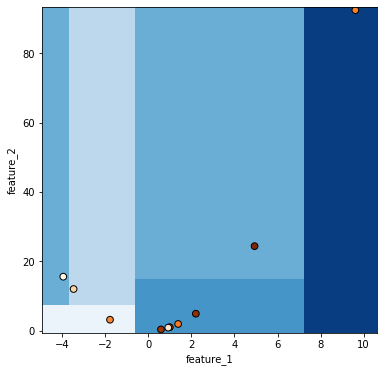

In [21]:
# Let's plot how the features split the data

# Plot parameters
plot_colors = "ryb"
plot_step = 0.02

# Plot the decision boundary
plt.figure(figsize=(6, 6))

x_min, x_max = x_poly[:, 0].min() - 1, x_poly[:, 0].max() + 1
y_min, y_max = x_poly[:, 1].min() - 1, x_poly[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = model_tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Blues)

plt.xlabel('feature_1')
plt.ylabel('feature_2')

plt.scatter(x_poly[:, 0], x_poly[:, 1], c=y_train.reshape(y_train.shape[0]), cmap='Oranges', edgecolor='black', s=45)

array([[ 0.45019779,  0.20267805],
       [ 2.69718659,  7.27481553],
       [ 0.98745441,  0.97506622],
       [ 8.2710868 , 68.4108768 ],
       [ 7.57795314, 57.42537381],
       [-0.42966682,  0.18461358],
       [ 4.78085578, 22.85658197],
       [-1.87156977,  3.5027734 ],
       [ 7.20393003, 51.89660782],
       [ 2.71431302,  7.36749518]])

array([[ 0.52924655],
       [ 1.32748668],
       [ 1.6251631 ],
       [ 3.26517607],
       [ 3.23711968],
       [-0.18266681],
       [ 0.60189692],
       [-1.3286241 ],
       [ 3.04557707],
       [ 0.86393337]])

### Short exercise 3.0
More features...

### 3.3 Additive trees: Random Forest


The elegance of **additive** approach is that 

C:\Users\Jon\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.21811
Feature: 1, Score: 0.00640
Feature: 2, Score: 0.37673
Feature: 3, Score: 0.06534
Feature: 4, Score: 0.12032
Feature: 5, Score: 0.07913
Feature: 6, Score: 0.12843
Feature: 7, Score: 0.00552


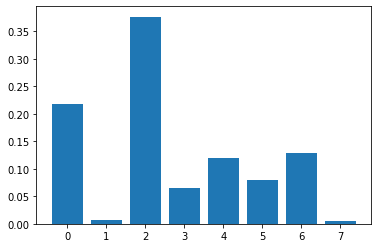

In [181]:
# Random Forest for feature importance on a regression problem

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

deg = 8  # Again, similar as in section 1.1, 8 degree is used.
# Fit the model to your data.
x_poly = transform(x_train,deg)

# Define the Random Forest model
model_rf = RandomForestRegressor()
# Fit the model
model_rf.fit(x_poly, y_train)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([ind for ind in range(len(importance))], importance)
plt.show()

(1000,)

4 Regression on real dataset: air pollution mapping
-------------------
In this challenge, you are going to work with GIS point dataset, where air pollutant NO2 and some potential predictors (indicators) are provided. While acquiring point measurement of NO2 at each station, indicators such as road length and population size within a buffer of the station is also obtained. Specifically you will have weekday daytime and nighttime NO2 point measurements at several stations (point). Road length and population size around each station (point) is indicated with the buffer size. For instance, 'populaiton_3000m' means population size within the 3000m buffer zone around each stations (point).

You will work with famous 'pandas' module to handle table based dataset. You will also try to learn how to study the functionality of the module by exploring online open source documentation.



### 4.0 Data

In [198]:
# The first thing you need to do is to import the 'pandas' module

import pandas as pd

# You can be able to read *.csv based GIS point dataset by using 'pandas'
data_all = pd.read_csv('data/no2.csv')  # 'Programming-Basics/data/no2.csv'
# Print(data_no2)
data_all.head(5)  # What does this mean?

,Point,Longitude,Latitude,weekday_daytime_no2,weekday_nighttime_no2,population_1000m,population_3000m,population_5000m,roadlength_1000m,roadlength_3000m,roadlength_5000m
0,1,3.749458,51.295278,15.486447,16.807046,440.064819,3312.588867,8206.84375,0.00000,28314.40625,60863.47656
1,2,3.916947,51.635556,14.697327,16.898273,492.458710,3886.029297,5170.12207,5352.03125,62689.73828,75216.85156
2,3,4.121389,51.978056,28.577064,30.600098,3102.089111,23252.750000,61342.87891,12614.07422,38824.15234,77248.41406
3,4,4.227778,51.931944,31.335268,33.090708,6142.983398,36911.640630,79492.71094,13942.57422,82291.88281,164851.23440
4,5,4.289172,52.078056,23.677740,26.016235,19552.472660,152638.750000,322745.00000,60375.49609,440915.18750,903282.81250


In [199]:
# Pandas dataframe allows to only show the variable names or the names of the columns
data_all.columns

Index(['Point', 'Longitude', 'Latitude', 'weekday_daytime_no2',
       'weekday_nighttime_no2', 'population_1000m', 'population_3000m',
       'population_5000m', 'roadlength_1000m', 'roadlength_3000m',
       'roadlength_5000m'],
      dtype='object')

In [193]:
# Extract the daytime NO2 data as a column
# Try to figure out what does the data type mean?

daytime_no2 = data_all['weekday_daytime_no2']

# You can further extract the values of the pandas column as Numpy array. Handy!

no2_val = daytime_no2.values
print(no2_val.shape)

(482,)


In [202]:
# Or you can extract values from multiple columns
variables = data_all.iloc[:,5:].values

print(variables[:5,:])  # Visualize the first 5 rows of the data

[[4.40064819e+02 3.31258887e+03 8.20684375e+03 0.00000000e+00
  2.83144062e+04 6.08634766e+04]
 [4.92458710e+02 3.88602930e+03 5.17012207e+03 5.35203125e+03
  6.26897383e+04 7.52168516e+04]
 [3.10208911e+03 2.32527500e+04 6.13428789e+04 1.26140742e+04
  3.88241523e+04 7.72484141e+04]
 [6.14298340e+03 3.69116406e+04 7.94927109e+04 1.39425742e+04
  8.22918828e+04 1.64851234e+05]
 [1.95524727e+04 1.52638750e+05 3.22745000e+05 6.03754961e+04
  4.40915188e+05 9.03282812e+05]]


### Short exercise 4.0

Before analyzing the data, it is always good to examine the data visually. There can be already some visible patterns in the data that can help you to make some assumptions and build models.

In [ ]:
# A simple way to visualize data is try to plot scatter plots to examine one-by-one how variables correlate to each other.
# Please try to define a function that can help you to visualze 

'''
# Answers and hints
def no2_scatter(name1, name2, data):
    series1 = data[name1]
    series2 = data[name2]
    
    val1 = series1.values
    val2 = series2.values
    
    plt.plot(val1, val2,'o')
    plt.title('scatter of'+name1+name2)
    plt.show()
'''

# Try to call the function to see if it works.

'''
# Answers and hints
no2_scatter('weekday_daytime_no2', 'roadlength_1000m', data_all)
'''

### Short exercise 4.1

Now recall what you have been experimented with in section 0, and try to fit simple linear models between anyone of variables and the NO2 data.

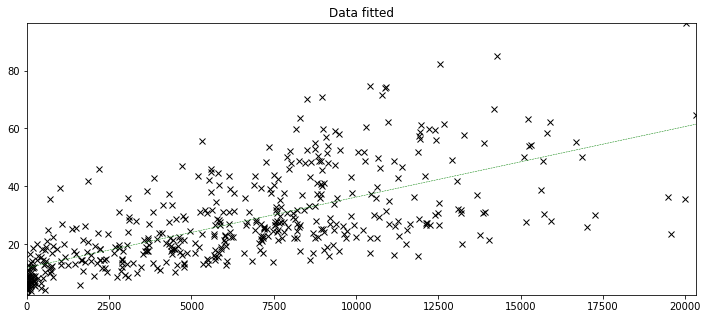

In [213]:
# Answers and hints
# Define a function to fit a linear model to the dummy data.
def fit(x, y):
    # x : (N, D) np.ndarray
    # y : (N,) np.ndarray
    # Linear fit means a linear model in the form of M(x) = θ1 + θ2x is assumed
    # Or, in the form of matrix multiplication M(X) = θ'X, where
    # X is referred as designed vector/matrix in the form of [1, x]' and θ is [θ1, θ2]'
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    
    # Given the observed data y, a proper solution of θ to M(x) can be: θ* = argmin (||y - X @ θ||^2_2)
    theta = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(y)  # If you see an @ in the middle of a line, that's matrix multiplication.
    var = np.mean(np.square(X_mat @ theta - y))
    return theta, var

def predict(x, theta, var, return_std:bool=False):
    X_mat=np.hstack((np.ones(len(x)).reshape(-1,1), x))  # X_mat is a designed matrix
    y = X_mat @ theta
    if return_std:
        y_std = np.sqrt(var) + np.zeros_like(y)
        return y, y_std
    return y

weights, variance = fit(data_all['population_1000m'].values.reshape(-1,1), data_all['weekday_daytime_no2'].values)

x_all = np.linspace(data_all['population_1000m'].values.min(), data_all['population_1000m'].values.max(), 500).reshape(-1,1)
no2_predict = predict(x_all, weights, variance)

plt.figure(figsize=(12,5))
plt.xlim([data_all['population_1000m'].values.min(), data_all['population_1000m'].values.max()])
plt.ylim([data_all['weekday_daytime_no2'].values.min(), data_all['weekday_daytime_no2'].values.max()])
plt.title('Data fitted')
plt.plot(data_all['population_1000m'].values, data_all['weekday_daytime_no2'].values,'kx',label='training data')
plt.plot(x_all, no2_predict, '--g', linewidth=.5)

In [214]:
# Try to further explore how each variable correlates to the NO2

### Short exercise 4.2

Does the above figures that you plotted appear to be similar to what you have in section 0.